<a href="https://colab.research.google.com/github/beryl09/beryl09/blob/main/Copy_of_PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALYSIS**
**Focus**

**Per capita ratio for all Races, Health data and violent and property rates in New jersey and their correlation.**



In [78]:
# @title
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [79]:
# @title
!pip install mapclassify
import mapclassify #need for thematic map classification
!pip install geodatasets
!pip install geopandas

**Mapping New Jersey counties shapefile**

**Code for downloading zipfile from github and extracting it**

In [80]:
# @title
import zipfile
import os

!wget -q -O nj-counties.zip https://github.com/beryl09/beryl09/raw/main/County_Boundaries_of_NJ%202.zip

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r')
zip_ref.extractall('/content')  # You can specify the destination directory if needed
zip_ref.close()

# Optionally, you can remove the downloaded zip file
os.remove('nj-counties.zip')


**Code for reading shapefile using geopandas**

In [81]:
# @title
import geopandas as gpd

njC = gpd.read_file('/content/County_Boundaries_of_NJ/County_Boundaries_of_NJ.shp')


In [82]:
# @title
njC.dtypes

OBJECTID         int64
GLOBALID        object
COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2020          int64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2020       int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

**Command used for visualizing a GeoDataFrame(in this case 'njC')using the default plotting capabilities of Geopandas**

<Axes: >

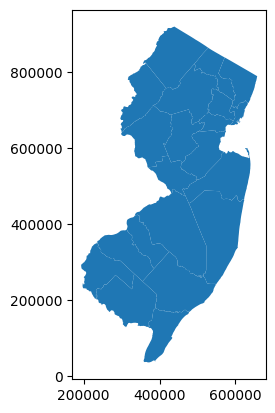

In [83]:
# @title
njC.plot()


**Analysis of unemployment rates and per capita ratios(All Races)**

**1. Unemployment Rates**

**Code for downloading labor forces xlsx file from github and extracting it**

In [84]:
! wget -q -O labor_forces.xlsx https://github.com/beryl09/beryl09/raw/main/annual%20labor%20force_county%202010-2022.xlsx

In [85]:
lab=pd.read_excel('/content/labor_forces.xlsx',skiprows=2) #load the labor forces estimates xlsx file

In [86]:
lab['County']=lab['County'].str.upper()

In [87]:
lab.dtypes

County                    object
Labor Force              float64
Employment               float64
Unemployment             float64
Unemployment Rate (%)    float64
dtype: object

In [88]:
lab.head(25)

,County,Labor Force,Employment,Unemployment,Unemployment Rate (%)
0,ATLANTIC,140527.0,122988.0,17539.0,12.5
1,BERGEN,480364.0,441308.0,39056.0,8.1
2,BURLINGTON,236893.0,215253.0,21640.0,9.1
3,CAMDEN,264642.0,235220.0,29422.0,11.1
4,CAPE MAY,50222.0,43082.0,7140.0,14.2
5,CUMBERLAND,72646.0,63067.0,9579.0,13.2
6,ESSEX,382784.0,340655.0,42129.0,11.0
7,GLOUCESTER,152479.0,136584.0,15895.0,10.4
8,HUDSON,354023.0,319751.0,34272.0,9.7
9,HUNTERDON,68375.0,63243.0,5132.0,7.5


In [89]:
njC = pd.merge(
    left = njC,
    right = lab,
    left_on ='COUNTY',
    right_on='County',
    how='outer',indicator=True
)

In [90]:
njC[['COUNTY','County','_merge']] # visualizing if the shapefile and the lab dataframe has merged

,COUNTY,County,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both
5,CUMBERLAND,CUMBERLAND,both
6,ESSEX,ESSEX,both
7,GLOUCESTER,GLOUCESTER,both
8,HUDSON,HUDSON,both
9,HUNTERDON,HUNTERDON,both


In [91]:
njC.dtypes

OBJECTID                  float64
GLOBALID                   object
COUNTY                     object
COUNTY_LAB                 object
CO                         object
GNIS_NAME                  object
GNIS                       object
FIPSSTCO                   object
FIPSCO                     object
ACRES                     float64
SQ_MILES                  float64
POP2020                   float64
POP2010                   float64
POP2000                   float64
POP1990                   float64
POP1980                   float64
POPDEN2020                float64
POPDEN2010                float64
POPDEN2000                float64
POPDEN1990                float64
POPDEN1980                float64
REGION                     object
Shape_Leng                float64
Shape_Area                float64
geometry                 geometry
County                     object
Labor Force               float64
Employment                float64
Unemployment              float64
Unemployment R

In [92]:
lab.dtypes

County                    object
Labor Force              float64
Employment               float64
Unemployment             float64
Unemployment Rate (%)    float64
dtype: object

<Axes: >

Text(0.5, 1.0, 'Map of Unemployment Rate (%) of New Jersey (per counties level)')

Text(0.5, 58.7222222222222, 'source/definition: https://github.com/beryl09/beryl09/raw/main/annual%20labor%20force_county%202010-2022.xlsx ')

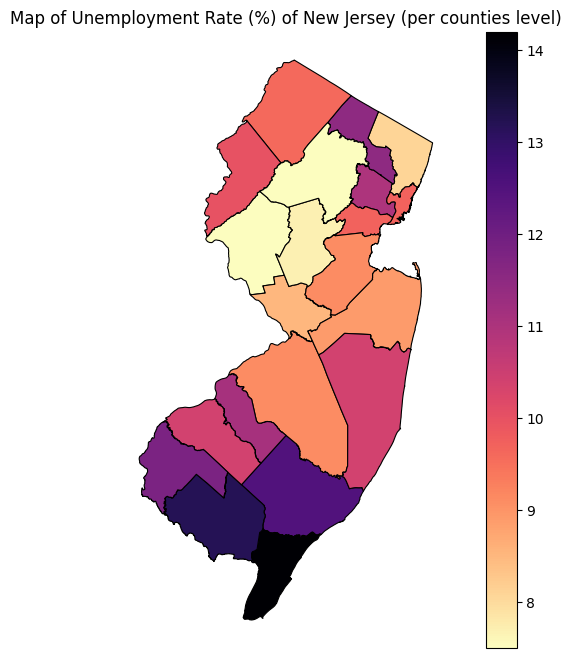

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
njC.plot(ax=ax,column = 'Unemployment Rate (%)' ,cmap='magma_r', linewidth=0.8, edgecolor='black', legend=True) #RdBu,Set3,Dark2,tab20,Paired,Accent,PuOr,Set2,Pastel2,YlOrBr,PuBuGn,Blues_r,Greens,jet,cividis,spectral,viridis,inferno,plasma,coolwarm
ax.set_title(f'Map of Unemployment Rate (%) of New Jersey (per counties level)')
ax.set_xlabel('''source/definition: https://github.com/beryl09/beryl09/raw/main/annual%20labor%20force_county%202010-2022.xlsx ''')
ax.set_axis_off()
plt.show()

In [94]:
lab=pd.read_excel("https://github.com/beryl09/beryl09/raw/main/annual%20labor%20force_county%202010-2022.xlsx",).head(5)

In [95]:
import seaborn as sns

In [96]:
lab=pd.read_excel('https://github.com/beryl09/beryl09/raw/main/annual%20labor%20force_county%202010-2022.xlsx',skiprows=2)

In [97]:
lab.head()

,County,Labor Force,Employment,Unemployment,Unemployment Rate (%)
0,Atlantic,140527.0,122988.0,17539.0,12.5
1,Bergen,480364.0,441308.0,39056.0,8.1
2,Burlington,236893.0,215253.0,21640.0,9.1
3,Camden,264642.0,235220.0,29422.0,11.1
4,Cape May,50222.0,43082.0,7140.0,14.2


In [98]:
lab[:10].style.background_gradient(cmap='Greens')

,County,Labor Force,Employment,Unemployment,Unemployment Rate (%)
0,Atlantic,140527.000000,122988.000000,17539.000000,12.500000
1,Bergen,480364.000000,441308.000000,39056.000000,8.100000
2,Burlington,236893.000000,215253.000000,21640.000000,9.100000
3,Camden,264642.000000,235220.000000,29422.000000,11.100000
4,Cape May,50222.000000,43082.000000,7140.000000,14.200000
5,Cumberland,72646.000000,63067.000000,9579.000000,13.200000
6,Essex,382784.000000,340655.000000,42129.000000,11.000000
7,Gloucester,152479.000000,136584.000000,15895.000000,10.400000
8,Hudson,354023.000000,319751.000000,34272.000000,9.700000
9,Hunterdon,68375.000000,63243.000000,5132.000000,7.500000


<ipython-input-99-a88a26661d34>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

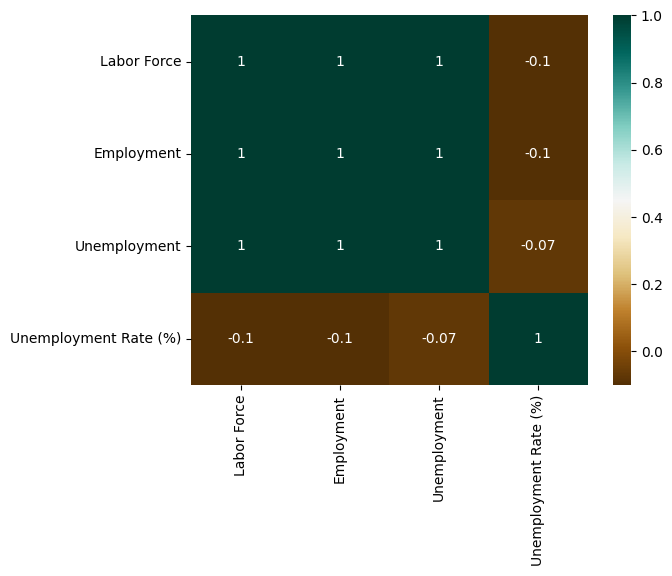

In [99]:
sns.heatmap(lab.corr().round(2),cmap="BrBG",annot=True)

In [100]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

In [101]:
px.scatter(lab, x="Unemployment", y="Unemployment Rate (%)", color="Labor Force",
                  hover_data=['County'],width=1000,height=600)

**Conclusion:**

In comparison of unemployment rates by counties we can conclude that there are high rates of unemployment in the counties of the South Jersey such as Atlantic,Camden,Cape May,Salem and Passic.Therefore we can draw our conclusions that if the rate of unemployment takes approximates of two thirds of the counties in the New Jersey then there are low contribution to the states economy

**2.wages in per capita ratios**

**Code for loading Annual Wage excel file from github and extracting it**

In [102]:
! wget -q -O percapital.xlsx https://github.com/beryl09/beryl09/raw/main/pcincrace5.xls

In [103]:
percapita=pd.read_excel('/content/percapital.xlsx',skiprows=7) #load the labor forces estimates xlsx file

In [104]:
percapita.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Atlantic County,"27,247","31,471","20,588","9,811","23,549","31,585","14,087","14,585","14,662","33,018"
1,Bergen County,"42,006","44,979","32,829","22,023","37,400",0,"24,673","21,962","25,949","47,889"
2,Burlington County,"34,802","37,404","27,077","20,633","35,971","25,409","18,337","19,498","20,032","38,088"


In [105]:
new_column_names = {
    'Unnamed: 0':'County',
    'Unnamed: 1':'All persons(per capita ratio)',
    'Unnamed: 2':'Whites Alone',
    'Unnamed: 3':'Black Alone',
    'Unnamed: 4':'American Indian',
    'Unnamed: 5':'Asian Alone',
}

In [106]:
percapita.rename(columns=new_column_names, inplace=True)


In [107]:
percapita['County'] = percapita['County'].str.replace(' County', '') # code to remove element i.e county from each cell of the column County

In [108]:
percapita['County']=percapita['County'].str.upper() # code or the command for

In [109]:
percapita.head(3)

,County,All persons(per capita ratio),Whites Alone,Black Alone,American Indian,Asian Alone,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,ATLANTIC,"27,247","31,471","20,588","9,811","23,549","31,585","14,087","14,585","14,662","33,018"
1,BERGEN,"42,006","44,979","32,829","22,023","37,400",0,"24,673","21,962","25,949","47,889"
2,BURLINGTON,"34,802","37,404","27,077","20,633","35,971","25,409","18,337","19,498","20,032","38,088"


In [110]:
percapita = percapita[['County', 'All persons(per capita ratio)','Whites Alone','Black Alone','American Indian','Asian Alone']]

percapita.head(3)

,County,All persons(per capita ratio),Whites Alone,Black Alone,American Indian,Asian Alone
0,ATLANTIC,"27,247","31,471","20,588","9,811","23,549"
1,BERGEN,"42,006","44,979","32,829","22,023","37,400"
2,BURLINGTON,"34,802","37,404","27,077","20,633","35,971"


In [111]:
percapita1 = percapita.dropna()
percapita1.head(3)


,County,All persons(per capita ratio),Whites Alone,Black Alone,American Indian,Asian Alone
0,ATLANTIC,"27,247","31,471","20,588","9,811","23,549"
1,BERGEN,"42,006","44,979","32,829","22,023","37,400"
2,BURLINGTON,"34,802","37,404","27,077","20,633","35,971"


In [112]:
percapita1['All persons(per capita ratio)'] =percapita1['All persons(per capita ratio)'].str.replace(',', '',).astype('int')


<ipython-input-112-5daeb2602bb2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Merging and joining the shapefile and the percapita data frame**

In [113]:
percapita1.head(3)

,County,All persons(per capita ratio),Whites Alone,Black Alone,American Indian,Asian Alone
0,ATLANTIC,27247,"31,471","20,588","9,811","23,549"
1,BERGEN,42006,"44,979","32,829","22,023","37,400"
2,BURLINGTON,34802,"37,404","27,077","20,633","35,971"


In [114]:
percapita1.dtypes

County                           object
All persons(per capita ratio)     int64
Whites Alone                     object
Black Alone                      object
American Indian                  object
Asian Alone                      object
dtype: object

In [115]:
njC.dtypes

OBJECTID                  float64
GLOBALID                   object
COUNTY                     object
COUNTY_LAB                 object
CO                         object
GNIS_NAME                  object
GNIS                       object
FIPSSTCO                   object
FIPSCO                     object
ACRES                     float64
SQ_MILES                  float64
POP2020                   float64
POP2010                   float64
POP2000                   float64
POP1990                   float64
POP1980                   float64
POPDEN2020                float64
POPDEN2010                float64
POPDEN2000                float64
POPDEN1990                float64
POPDEN1980                float64
REGION                     object
Shape_Leng                float64
Shape_Area                float64
geometry                 geometry
County                     object
Labor Force               float64
Employment                float64
Unemployment              float64
Unemployment R

In [116]:
njC = pd.merge(
    left=njC,
    right=percapita1,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    suffixes=('', '_percapita'),  # Change the indicator name to a suffix
)


In [117]:
njC[['COUNTY','County','_merge']] # visualizing if the shapefile and the lab dataframe has merged

,COUNTY,County,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both
5,CUMBERLAND,CUMBERLAND,both
6,ESSEX,ESSEX,both
7,GLOUCESTER,GLOUCESTER,both
8,HUDSON,HUDSON,both
9,HUNTERDON,HUNTERDON,both


In [118]:
njC.dtypes

OBJECTID                          float64
GLOBALID                           object
COUNTY                             object
COUNTY_LAB                         object
CO                                 object
GNIS_NAME                          object
GNIS                               object
FIPSSTCO                           object
FIPSCO                             object
ACRES                             float64
SQ_MILES                          float64
POP2020                           float64
POP2010                           float64
POP2000                           float64
POP1990                           float64
POP1980                           float64
POPDEN2020                        float64
POPDEN2010                        float64
POPDEN2000                        float64
POPDEN1990                        float64
POPDEN1980                        float64
REGION                             object
Shape_Leng                        float64
Shape_Area                        

In [119]:
import seaborn as sns

In [120]:
NJC3 = njC[['County', 'Employment', 'Unemployment','County_percapita','All persons(per capita ratio)']]
NJC3 = njC.iloc[1:,:]
NJC3.head(2)

,OBJECTID,GLOBALID,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,...,Employment,Unemployment,Unemployment Rate (%),_merge,County_percapita,All persons(per capita ratio),Whites Alone,Black Alone,American Indian,Asian Alone
1,2.0,{1287F6F9-8291-47AD-92B6-E1753A15B262},BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153489.661221,...,441308.0,39056.0,8.1,both,BERGEN,42006.0,"44,979","32,829","22,023","37,400"
2,3.0,{BAE26D96-91E5-4C3A-BBBD-B3E11C6859EC},BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,524901.239973,...,215253.0,21640.0,9.1,both,BURLINGTON,34802.0,"37,404","27,077","20,633","35,971"


In [121]:
NJC3.dtypes

OBJECTID                          float64
GLOBALID                           object
COUNTY                             object
COUNTY_LAB                         object
CO                                 object
GNIS_NAME                          object
GNIS                               object
FIPSSTCO                           object
FIPSCO                             object
ACRES                             float64
SQ_MILES                          float64
POP2020                           float64
POP2010                           float64
POP2000                           float64
POP1990                           float64
POP1980                           float64
POPDEN2020                        float64
POPDEN2010                        float64
POPDEN2000                        float64
POPDEN1990                        float64
POPDEN1980                        float64
REGION                             object
Shape_Leng                        float64
Shape_Area                        

In [122]:
# Select specific columns
selected_columns = njC[['County', 'Employment', 'Unemployment','All persons(per capita ratio)']]

# Display the dataframe with selected columns
print("\nDataFrame with Selected Columns:")
selected_columns.head(5)


DataFrame with Selected Columns:


,County,Employment,Unemployment,All persons(per capita ratio)
0,ATLANTIC,122988.0,17539.0,27247.0
1,BERGEN,441308.0,39056.0,42006.0
2,BURLINGTON,215253.0,21640.0,34802.0
3,CAMDEN,235220.0,29422.0,29478.0
4,CAPE MAY,43082.0,7140.0,33571.0


In [123]:
selected_columns[:10].style.background_gradient(cmap='Greens')

,County,Employment,Unemployment,All persons(per capita ratio)
0,ATLANTIC,122988.000000,17539.000000,27247.000000
1,BERGEN,441308.000000,39056.000000,42006.000000
2,BURLINGTON,215253.000000,21640.000000,34802.000000
3,CAMDEN,235220.000000,29422.000000,29478.000000
4,CAPE MAY,43082.000000,7140.000000,33571.000000
5,CUMBERLAND,63067.000000,9579.000000,21883.000000
6,ESSEX,340655.000000,42129.000000,31535.000000
7,GLOUCESTER,136584.000000,15895.000000,31210.000000
8,HUDSON,319751.000000,34272.000000,31024.000000
9,HUNTERDON,63243.000000,5132.000000,48489.000000


<ipython-input-124-7fb9905cb267>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

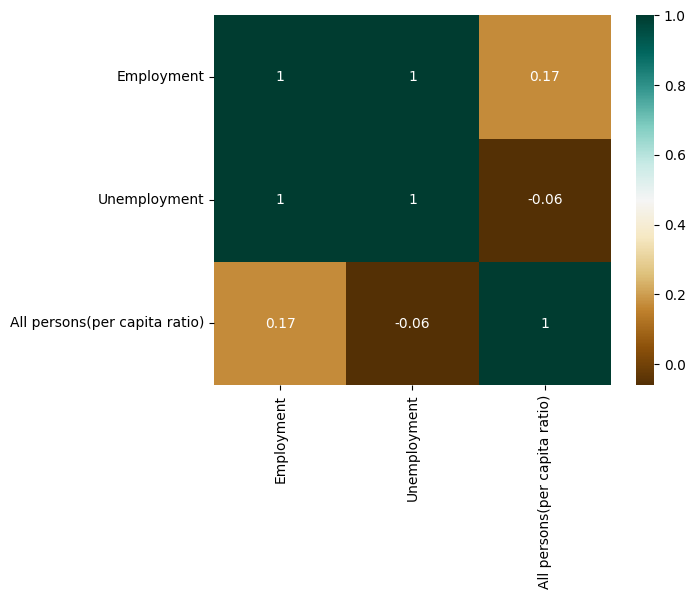

In [124]:
sns.heatmap(selected_columns.corr().round(2),cmap="BrBG",annot=True)

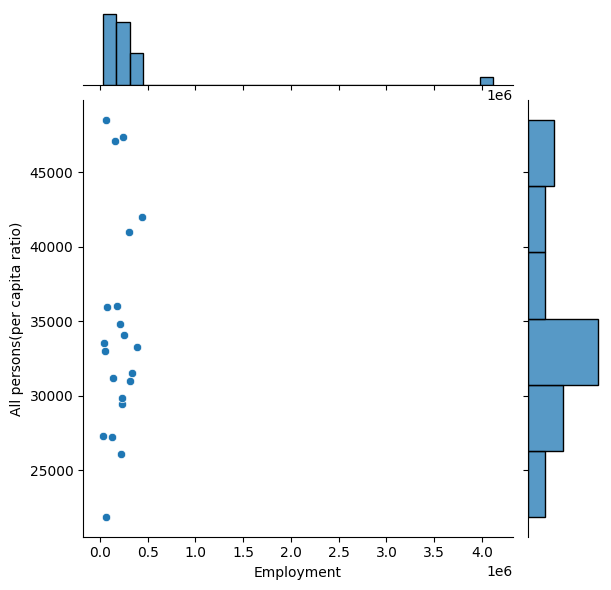

In [125]:
sns.jointplot(x ='Employment', y ='All persons(per capita ratio)', data = selected_columns)

In [126]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

In [127]:
px.scatter(selected_columns, x="All persons(per capita ratio)", y="Unemployment",
                  hover_data=['County'],width=1000,height=600)

**Conclusion:**

From the analysis we can conclude that a higher per capita income may suggest greater economic prosperity example of the counties such as Hunderdon,Morris and Somerset. In economically prosperous regions, there might be more job opportunities, leading to lower unemployment rates. Conversely, regions with lower per capita income may experience higher unemployment due to limited job opportunities or lower demand for labor example of the counties such as Cumberland,Passaic,Salem and Atlantic.

In [128]:
#print("lab columns:", lab.columns)
#print("percapita1 columns:", percapita1.columns)


**Per capita income by Races**

In [129]:
import seaborn as sns

In [130]:
Percapita=pd.read_excel('https://github.com/beryl09/beryl09/raw/main/pcincrace5.xls',skiprows=7)

In [131]:
new_column_names = {
    'Unnamed: 0':'County',
    'Unnamed: 1':'All persons(per capita ratio)',
    'Unnamed: 2':'Whites Alone',
    'Unnamed: 3':'Black Alone',
    'Unnamed: 4':'American Indian',
    'Unnamed: 5':'Asian Alone',
}

In [132]:

percapita.rename(columns=new_column_names, inplace=True)
percapita['County'] = percapita['County'].str.replace(' County', '') # code to remove element i.e county from each cell of the column County
percapita['County']=percapita['County'].str.upper() # code or the command for
percapita.head(3)

,County,All persons(per capita ratio),Whites Alone,Black Alone,American Indian,Asian Alone
0,ATLANTIC,"27,247","31,471","20,588","9,811","23,549"
1,BERGEN,"42,006","44,979","32,829","22,023","37,400"
2,BURLINGTON,"34,802","37,404","27,077","20,633","35,971"


In [133]:
# Remove commas and convert to integers for selected columns
columns_to_convert = ['All persons(per capita ratio)', 'Whites Alone', 'Black Alone', 'American Indian', 'Asian Alone']
percapita1[columns_to_convert] = percapita1[columns_to_convert].replace(',', '', regex=True).astype('int')

# Display the DataFrame
percapita1.head(3)


<ipython-input-133-7926529c9bd2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,County,All persons(per capita ratio),Whites Alone,Black Alone,American Indian,Asian Alone
0,ATLANTIC,27247,31471,20588,9811,23549
1,BERGEN,42006,44979,32829,22023,37400
2,BURLINGTON,34802,37404,27077,20633,35971


In [134]:
percapita1[:10].style.background_gradient(cmap='Greens')

,County,All persons(per capita ratio),Whites Alone,Black Alone,American Indian,Asian Alone
0,ATLANTIC,27247,31471,20588,9811,23549
1,BERGEN,42006,44979,32829,22023,37400
2,BURLINGTON,34802,37404,27077,20633,35971
3,CAMDEN,29478,34233,21308,17601,29831
4,CAPE MAY,33571,34984,23238,18393,37023
5,CUMBERLAND,21883,25696,14803,18755,22495
6,ESSEX,31535,44690,20935,16243,40980
7,GLOUCESTER,31210,32363,26606,22625,32535
8,HUDSON,31024,35293,22429,20654,39240
9,HUNTERDON,48489,50181,16900,7308,51268


<ipython-input-135-d6d6f5ac9f1c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

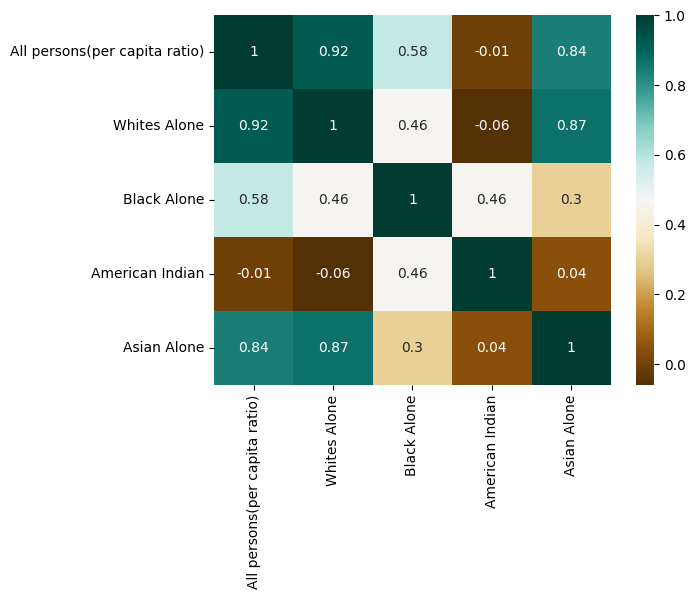

In [135]:
sns.heatmap(percapita1.corr().round(2),cmap="BrBG",annot=True)

In [136]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

In [137]:
px.scatter(percapita1, x="Black Alone", y="Whites Alone", color="All persons(per capita ratio)",
                  hover_data=['County'],width=1000,height=600)

In [138]:
px.scatter(percapita1, x="Asian Alone", y="Whites Alone", color="All persons(per capita ratio)",
                  hover_data=['County'],width=1000,height=600)

In [139]:
px.scatter(percapita1, x="American Indian", y="Whites Alone", color="All persons(per capita ratio)",
                  hover_data=['County'],width=1000,height=600)

**Conclusion:**

From the Analysis we can conclude that there is a strong relationship between the two races(whites and Asians) per capita ratio to employments and unemployment rates

# **Health Data Analysis**

**Hospital performances Ranks**

In [140]:
! wget -q -O health_ranks.xlsx https://github.com/beryl09/beryl09/raw/main/2023%20County%20Health%20Rankings%20New%20Jersey%20Data%20-%20v2.xlsx

In [141]:
Health=pd.read_excel('/content/health_ranks.xlsx') #load the labor forces estimates xlsx file


DataFrame with selected columns:

DataFrame after renaming columns:


<ipython-input-142-7c228587df13>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,County,Length of life Rank,Quality of life Rank,Health Behaviors Ranks,Clinical care Ranks,Social and Economic Factors Ranks,Physical Enviroment Ranks
1,Atlantic,19.0,16.0,19.0,15.0,20.0,8.0
2,Bergen,2.0,5.0,3.0,1.0,4.0,21.0
3,Burlington,10.0,9.0,9.0,6.0,7.0,15.0
4,Camden,17.0,18.0,17.0,13.0,15.0,20.0


<ipython-input-142-7c228587df13>:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

<Axes: >

[]

[]

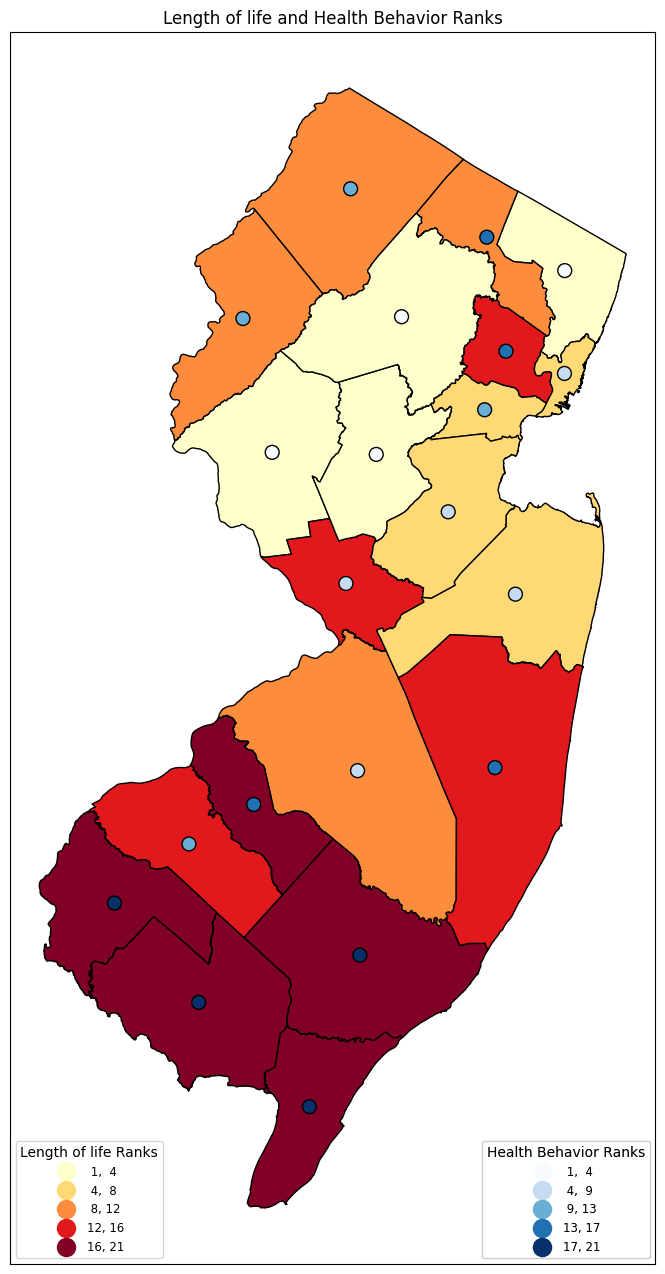

In [142]:
# Specify the sheet name containing the DataFrame you want to subset
sheet_name = 'Outcomes & Factors SubRankings'  # Replace with the actual sheet name
# Read the specific sheet into a DataFrame
Health = pd.read_excel('/content/health_ranks.xlsx', sheet_name='Outcomes & Factors SubRankings',skiprows=1)

# Define your subset criteria
# For example, let's say you want to subset based on a column named 'Column_Name' where values are greater than 10
#subset_criteria = Health['Introduction'].str.strip() > 10

# Subset the DataFrame based on the criteria
#subset_Health = Health[subset_criteria]

# Display the subset DataFrame
#subset_Health.head(4)
Health_cleaned = Health.dropna()

# Display the DataFrame after dropping rows with NaN values
#print("\nDataFrame after dropping rows with NaN values:")
#Health_cleaned.head(4)

# Select specific columns
selected_columns = Health_cleaned[['County','Rank', 'Rank.1','Rank.2','Rank.3','Rank.4','Rank.5']]

# Display the DataFrame with selected columns
print("\nDataFrame with selected columns:")
#selected_columns.head(4)

# Rename columns
new_column_names = {'Rank': 'Length of life Rank', 'Rank.1': 'Quality of life Rank', 'Rank.2': 'Health Behaviors Ranks','Rank.3': 'Clinical care Ranks','Rank.4': 'Social and Economic Factors Ranks','Rank.5': 'Physical Enviroment Ranks'}
selected_columns.rename(columns=new_column_names, inplace=True)

# Display the DataFrame after renaming columns
print("\nDataFrame after renaming columns:")
selected_columns.head(4)

selected_columns['County']=selected_columns['County'].str.upper() # code or the command for

njC = pd.merge(
    left = njC,
    right =selected_columns,
    left_on ='COUNTY',
    right_on='County',
    how='outer',
    suffixes=('', 'selected_columns'),
)
newmap = njC.copy()

newmap["geometry"] = newmap["geometry"].centroid

fig, ax = plt.subplots(1, figsize=(12,16))
njC.plot(ax=ax,column='Length of life Rank',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Length of life Ranks''')

newmap.plot(ax=ax,column='Health Behaviors Ranks',legend=True,cmap='Blues',scheme='natural_breaks',k=5,      #centroids are in newmap
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100) #

ax.title.set_text("Length of life and Health Behavior Ranks")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Health Behavior Ranks''')


ax.add_artist(l2)
ax.add_artist(l1)




**Conclusion**

From the observation we find out that length of life per counties has strong relationship with health behavior ranks. That is the length of life in the south  Jersey record poor ranks and health behavior because of insufficient health care facilities.


DataFrame after renaming columns:


,COUNTY,Geo_NAME,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both
5,CUMBERLAND,CUMBERLAND,both
6,ESSEX,ESSEX,both
7,GLOUCESTER,GLOUCESTER,both
8,HUDSON,HUDSON,both
9,HUNTERDON,HUNTERDON,both


<Axes: >

<Axes: >

[]

[]

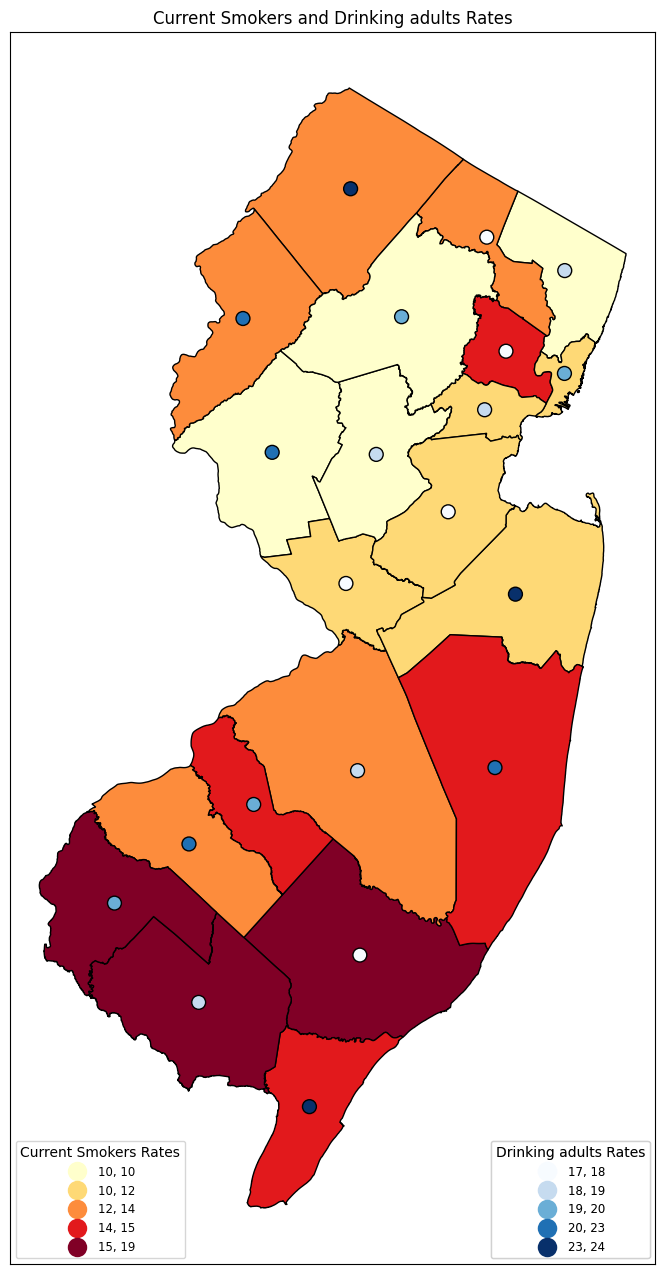

In [143]:
import pandas as pd

# Replace the GitHub CSV file URL with your own URL
github_csv_url = 'https://github.com/beryl09/beryl09/raw/main/Tobacco%20and%20Alcohol%20usage.csv'

# Read the CSV file into a DataFrame
health = pd.read_csv(github_csv_url)

# Display the first few rows of the DataFrame
#health.head(10)

new_column_names = {'Geo_Name': 'County',
                    'SE_T011_001': 'Current Smokers',
                    'SE_T011_002':'Drinking adults'}

# Use the rename method to rename the columns
health.rename(columns=new_column_names, inplace=True)

# Display the DataFrame after renaming columns
print("\nDataFrame after renaming columns:")
#health.head(4)

health['Geo_NAME'] = health['Geo_NAME'].str.replace(' County', '') # code to remove element i.e county from each cell of the column County
health['Geo_NAME']=health['Geo_NAME'].str.upper() # code or the command for
#health.head(4)

njC = pd.merge(
    left = njC,
    right = health,
    left_on ='COUNTY',
    right_on='Geo_NAME',
    how='outer',
    suffixes=('', 'health'),
)

njC[['COUNTY','Geo_NAME','_merge']] # visualizing if the shapefile and the selected columns health dataframe has merged

newmap = njC.copy()

newmap["geometry"] = newmap["geometry"].centroid

fig, ax = plt.subplots(1, figsize=(12,16))
njC.plot(ax=ax,column='Current Smokers',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Current Smokers Rates''')

newmap.plot(ax=ax,column='Drinking adults',legend=True,cmap='Blues',scheme='natural_breaks',k=5,      #centroids are in newmap
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100) #

ax.title.set_text("Current Smokers and Drinking adults Rates")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Drinking adults Rates''')


ax.add_artist(l2)
ax.add_artist(l1)






In [144]:
health[:10].style.background_gradient(cmap='Greens')

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,Current Smokers,Drinking adults
0,34001,ATLANTIC,"Atlantic County, New Jersey",0,34,1,16.700000,17.537823
1,34003,BERGEN,"Bergen County, New Jersey",0,34,3,10.500000,18.644612
2,34005,BURLINGTON,"Burlington County, New Jersey",0,34,5,12.800000,19.327722
3,34007,CAMDEN,"Camden County, New Jersey",0,34,7,15.200000,20.032324
4,34009,CAPE MAY,"Cape May County, New Jersey",0,34,9,14.900000,23.263439
5,34011,CUMBERLAND,"Cumberland County, New Jersey",0,34,11,19.100000,18.616385
6,34013,ESSEX,"Essex County, New Jersey",0,34,13,14.400000,17.337296
7,34015,GLOUCESTER,"Gloucester County, New Jersey",0,34,15,13.400000,22.403663
8,34017,HUDSON,"Hudson County, New Jersey",0,34,17,11.900000,20.377187
9,34019,HUNTERDON,"Hunterdon County, New Jersey",0,34,19,10.300000,22.239416


In [145]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

In [146]:
px.scatter(health, x="Current Smokers", y="Drinking adults",
                  hover_data=['Geo_NAME'],width=1000,height=600)

**Conclusion**

There is no strong relationship between adults consuming Tobacco and alcohol in some regions like Morris County, Somerset County which needs to be considered in future.

In [147]:
#fig, ax = plt.subplots(1, 1, figsize=(7, 10))
#njC.plot(ax=ax,column = 'Tobacco and alcohol usage' ,cmap='RdYlBu_r', linewidth=0.8, edgecolor='black', legend=True) #RdBu,Set3,Dark2,tab20,Paired,Accent,PuOr,Set2,Pastel2,YlOrBr,PuBuGn,Blues_r,Greens,jet,cividis,spectral,viridis,inferno,plasma,coolwarm
#ax.set_title(f'Tobacco and alcohol usage')
#ax.set_xlabel('''source/definition: ''')
#ax.set_axis_off()
#plt.show()

In [148]:
import time, webbrowser, zipfile

import pandas as pd
import geopandas as gpd

from google.colab import data_table
data_table.enable_dataframe_formatter()

from geopandas.tools import geocode
#! pip install geocoder
from geopy.geocoders import Nominatim
#if you do a lot of geocoding:
#https://developers.google.com/maps/documentation/geocoding/overview

geolocator = Nominatim(user_agent='blah@gmail.com')

from google.colab import files

import folium as f
from folium.plugins import MarkerCluster, HeatMap

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [149]:
!pip install mapclassify
import mapclassify

# **Violence and property crime analysis**

,Geo_FIPS,Geo_Name,Geo_QName,SE_T003_001,SE_T003_002,SE_T003_003
0,34001,Atlantic County,"Atlantic County, New Jersey",3337.100168,386.978624,2950.121544
1,34003,Bergen County,"Bergen County, New Jersey",1135.745288,82.050447,1053.694841
2,34005,Burlington County,"Burlington County, New Jersey",1674.367721,168.993289,1505.374431
3,34007,Camden County,"Camden County, New Jersey",3028.933269,467.871274,2561.061995



DataFrame after renaming columns:


,Geo_FIPS,County,Geo_QName,"Total crime and violent rates(per 100,000 popul)","Violent crime rates(per 100,000)","Property crime rates(per 100,000 popul)"
0,34001,Atlantic County,"Atlantic County, New Jersey",3337.100168,386.978624,2950.121544
1,34003,Bergen County,"Bergen County, New Jersey",1135.745288,82.050447,1053.694841
2,34005,Burlington County,"Burlington County, New Jersey",1674.367721,168.993289,1505.374431
3,34007,Camden County,"Camden County, New Jersey",3028.933269,467.871274,2561.061995


,Geo_FIPS,County,Geo_QName,"Total crime and violent rates(per 100,000 popul)","Violent crime rates(per 100,000)","Property crime rates(per 100,000 popul)"
0,34001,ATLANTIC,"Atlantic County, New Jersey",3337.100168,386.978624,2950.121544
1,34003,BERGEN,"Bergen County, New Jersey",1135.745288,82.050447,1053.694841
2,34005,BURLINGTON,"Burlington County, New Jersey",1674.367721,168.993289,1505.374431
3,34007,CAMDEN,"Camden County, New Jersey",3028.933269,467.871274,2561.061995


<Axes: >

<Axes: >

[]

[]

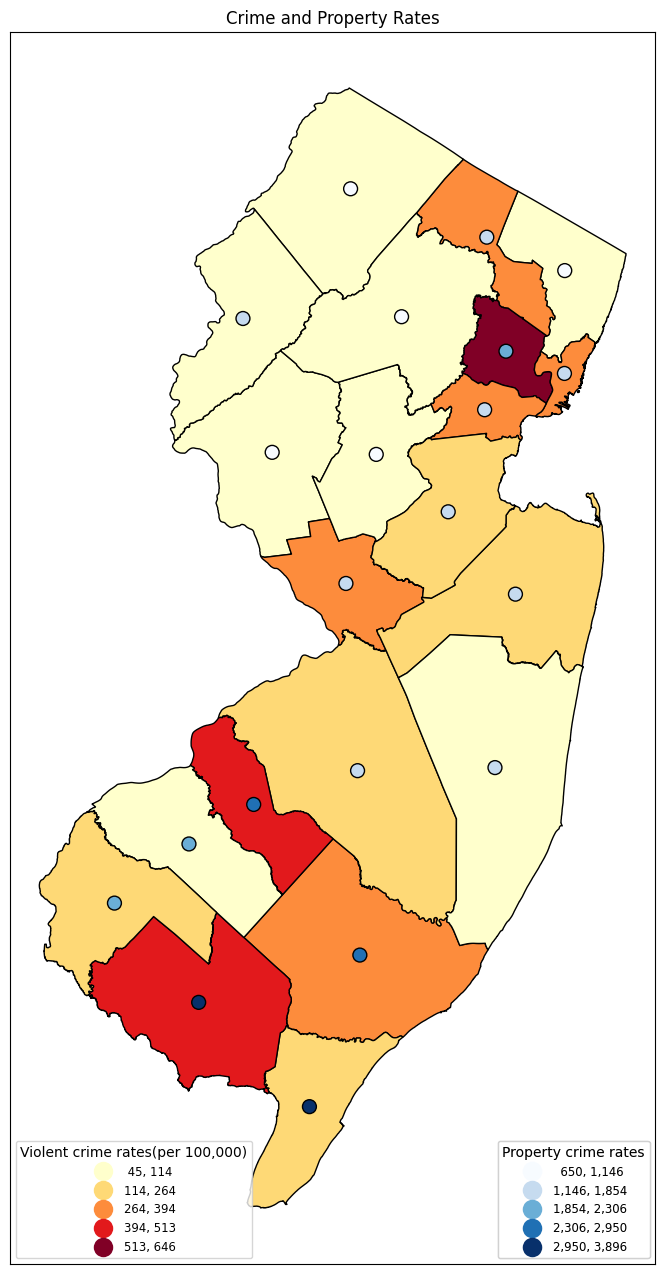

In [159]:
import pandas as pd

# Replace the GitHub CSV file URL with your own URL
github_csv_url = 'https://github.com/beryl09/beryl09/raw/main/crime%20and%20property%20dataset_SL050.csv'

# Read the CSV file into a DataFrame
dataset = pd.read_csv(github_csv_url)

# Display the first few rows of the DataFrame
dataset.head(4)
new_column_names = {'Geo_Name': 'County',
                    'SE_T003_001': 'Total crime and violent rates(per 100,000 popul)',
                    'SE_T003_002':'Violent crime rates(per 100,000)',
                    'SE_T003_003':'Property crime rates(per 100,000 popul)'
                    }

# Use the rename method to rename the columns
dataset.rename(columns=new_column_names, inplace=True)

# Display the DataFrame after renaming columns
print("\nDataFrame after renaming columns:")
dataset.head(4)

dataset['County'] = dataset['County'].str.replace(' County', '') # code to remove element i.e county from each cell of the column County
dataset['County']= dataset['County'].str.upper() # code or the command for
dataset.head(4)

njC = pd.merge(
    left = njC,
    right = dataset,
    left_on ='COUNTY',
    right_on='County',
    how='outer',
    suffixes=('', 'dataset'),
)

newmap = njC.copy()

newmap["geometry"] = newmap["geometry"].centroid

fig, ax = plt.subplots(1, figsize=(12,16))
njC.plot(ax=ax,column='Violent crime rates(per 100,000)',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Violent crime rates(per 100,000)''')

newmap.plot(ax=ax,column='Property crime rates(per 100,000 popul)',legend=True,cmap='Blues',scheme='natural_breaks',k=5,      #centroids are in newmap
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100) #

ax.title.set_text("Crime and Property Rates")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Property crime rates''')

ax.add_artist(l2)
ax.add_artist(l1)



In [151]:
import seaborn as sns

In [152]:
dataset=pd.read_csv('https://github.com/beryl09/beryl09/raw/main/violent%20and%20property%20crime_SL050.csv')

In [153]:
dataset.head()

,Geo_FIPS,Geo_Name,Geo_QName,SE_T003_001,SE_T003_002,SE_T003_003
0,34001,Atlantic County,"Atlantic County, New Jersey",3337.100168,386.978624,2950.121544
1,34003,Bergen County,"Bergen County, New Jersey",1135.745288,82.050447,1053.694841
2,34005,Burlington County,"Burlington County, New Jersey",1674.367721,168.993289,1505.374431
3,34007,Camden County,"Camden County, New Jersey",3028.933269,467.871274,2561.061995
4,34009,Cape May County,"Cape May County, New Jersey",3954.103037,241.231750,3712.871287


In [154]:
dataset = dataset.rename(columns={'Geo_Name': 'County', 'SE_T003_002': 'Violent Crime rates','SE_T003_003': 'Property crime rates','SE_T003_001': 'Total Crime rates'})


In [155]:
dataset[:10].style.background_gradient(cmap='Greens')

,Geo_FIPS,County,Geo_QName,Total Crime rates,Violent Crime rates,Property crime rates
0,34001,Atlantic County,"Atlantic County, New Jersey",3337.100168,386.978624,2950.121544
1,34003,Bergen County,"Bergen County, New Jersey",1135.745288,82.050447,1053.694841
2,34005,Burlington County,"Burlington County, New Jersey",1674.367721,168.993289,1505.374431
3,34007,Camden County,"Camden County, New Jersey",3028.933269,467.871274,2561.061995
4,34009,Cape May County,"Cape May County, New Jersey",3954.103037,241.231750,3712.871287
5,34011,Cumberland County,"Cumberland County, New Jersey",4408.821455,512.742314,3896.079141
6,34013,Essex County,"Essex County, New Jersey",2952.283646,646.204772,2306.078874
7,34015,Gloucester County,"Gloucester County, New Jersey",2291.794838,114.108561,2177.686277
8,34017,Hudson County,"Hudson County, New Jersey",1952.579153,359.728896,1592.850257
9,34019,Hunterdon County,"Hunterdon County, New Jersey",695.661831,45.214053,650.447778


<ipython-input-156-9fd7d17577bf>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

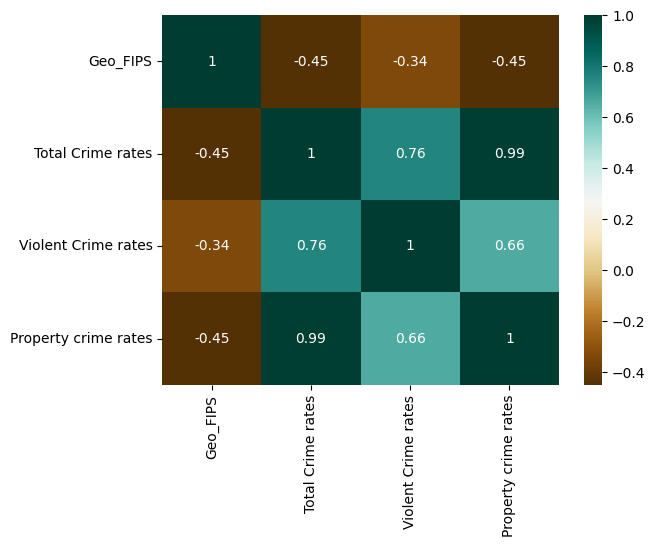

In [156]:
sns.heatmap(dataset.corr().round(2),cmap="BrBG",annot=True)

In [157]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

In [158]:
px.scatter(dataset, x="Violent Crime rates", y="Property crime rates", color="Total Crime rates",
                  hover_data=['County'],width=1000,height=600)


**Conclusion:**

From the analysis we can conclude that there is a strong relationship between violent crime rates and property crimes rates as per the correlation matrix. Therefore the higher the crime rates the lower the investments in some regions like Essex, Camden andCumberland that potray highset rates of crimes that can detter both foreign and domestic investments.